<a href="https://colab.research.google.com/github/nishi1612/Modelling-and-Simulation/blob/master/ModSim_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
def plot(string,lis):
  time_instant = 99
  temp = lis[:,time_instant]
  mini = np.min(temp)
  maxi = np.max(temp)
  print(mini,maxi)
  plt.hist(temp,bins=int(abs(mini)+abs(maxi)),density=True)
  plt.xlabel('Postion')
  plt.title(string + 'PDF at 100th time instant for being at xth position')
  plt.ylabel('Probability')
  plt.show()

In [0]:
def plot2(string,lis):
  time_instant = 99
  temp = lis[:,time_instant]
  mini = np.min(temp)
  maxi = np.max(temp)
  print(mini,maxi)
  plt.hist(temp,bins=int(abs(mini)+abs(maxi)),density=True)
  plt.xlabel('Postion')
  plt.title(string + 'CDF at 100th time instant for being at xth position')
  plt.ylabel('Probability')
  plt.show()

In [0]:
def info(lis):
  time_instant = 99
  temp = lis[:,time_instant]
  mean_distance = np.mean(temp)
  mean_sq_distance = np.mean(np.square(temp))
  print(mean_distance , mean_sq_distance)
  return mean_distance , mean_sq_distance

In [0]:
def find_diffusion_constant(string , lis):
  var = []
  ans = 0
  count =0
  for i in range(1,time):
    temp = lis[:,i]
    v = np.var(temp)
    var.append(v)
    plt.plot(i,v/(2*i),'bo')
    ans = ans + v/(2*i)
    count = count + 1
  
  plt.title(string + 'Diffusion constant at different time instants')
  plt.ylabel('Value of diffusion constant')
  plt.xlabel('Time instant(t)')
  plt.show()

  plt.plot(np.arange(1,time,1),var)
  plt.title(string + 'Variance at different time instants')
  plt.xlabel('Time instant(t)')
  plt.ylabel('Value of variance')
  plt.show()
  
  print(ans/count)
  return ans/count

In [0]:
runs = 100000
random.seed(2)
lis = []
for r in range(runs):
  init = 0
  time = 100
  k = 0
  walks = np.zeros(time)
  walks[k] = init
  k = k +1
  for i in range(1,time):
    t = random.choice([1,-1])
    init = init + t
    walks[k] = init
    k = k+1
  lis.append(walks)  
  del walks
lis = np.asarray(lis)

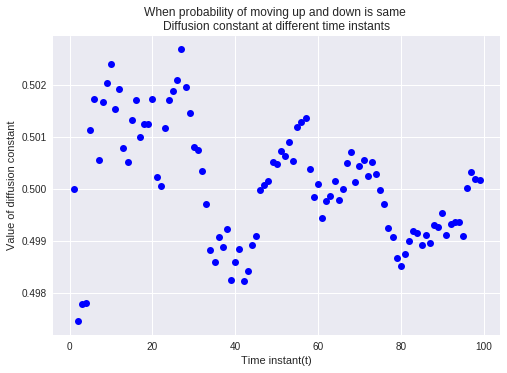

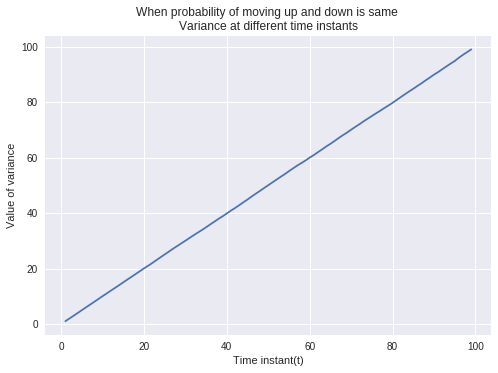

0.500093233842223
-47.0 43.0


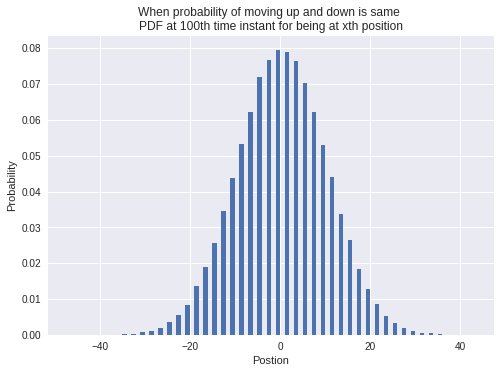

-0.02956 99.03496


In [0]:
find_diffusion_constant("When probability of moving up and down is same \n", lis)
plot("When probability of moving up and down is same \n",lis)
info(lis)
del lis

In [0]:
random.seed(2)
prob = [0.3,0.7]

runs = 100000
lis = []
for r in range(runs):
  init = 0
  time = 100
  k = 0
  walks = np.zeros(time)
  walks[k] = init
  k = k + 1
  rr = np.random.random(len(walks)-1)
  downp = rr < prob[0]
  for i in range(1,time):
      if(downp[i-1] == True) :
        t = -1
      else:
        t = 1
      init = init + t
      walks[k] = init
      k = k+1
  lis.append(walks)
  del walks
lis = np.asarray(lis)

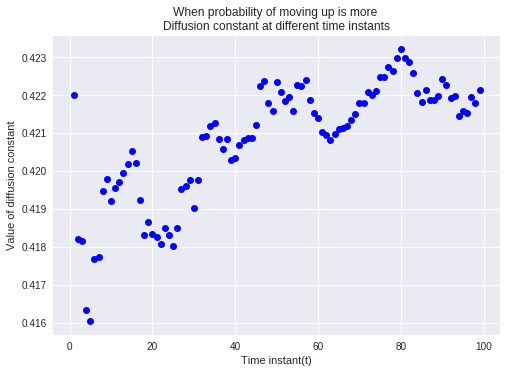

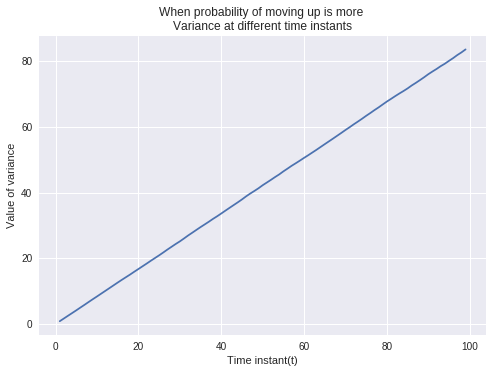

0.42084525183315225
-1.0 75.0


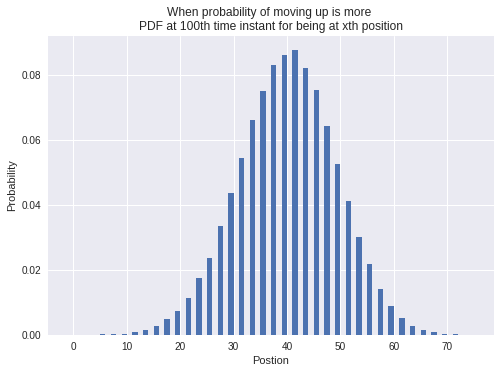

39.587 1650.71392


In [0]:
find_diffusion_constant("When probability of moving up is more \n", lis)
plot("When probability of moving up is more \n",lis)
info(lis)
del lis

We observe that as probabilty of moving up increases the probability distribution of position at 100th time instant shifts on X axis scale.

In [0]:
random.seed(2)
prob = [0.7,0.3]

runs = 100000
lis = []
for r in range(runs):
  init = 0
  time = 100
  k = 0
  walks = np.zeros(time)
  walks[k] = init
  k = k + 1
  rr = np.random.random(len(walks)-1)
  downp = rr < prob[0]
  for i in range(1,time):
      if(downp[i-1] == True) :
        t = -1
      else:
        t = 1
      init = init + t
      walks[k] = init
      k = k+1
  lis.append(walks)
  del walks
lis = np.asarray(lis)

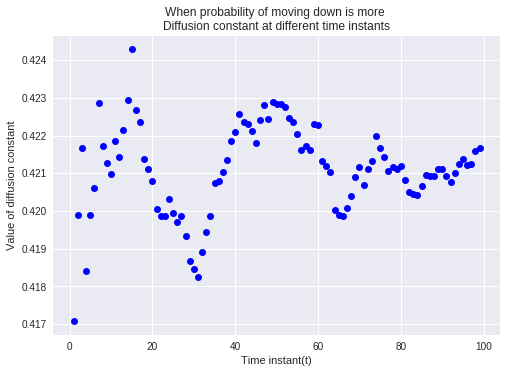

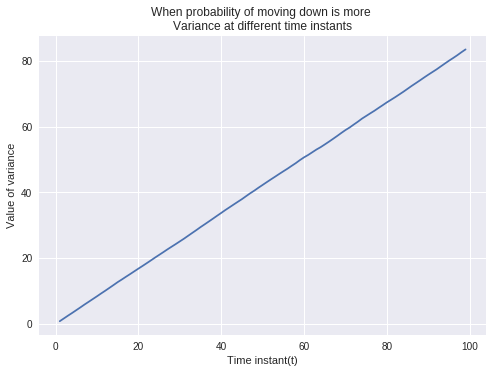

0.4211105160765115
-75.0 7.0


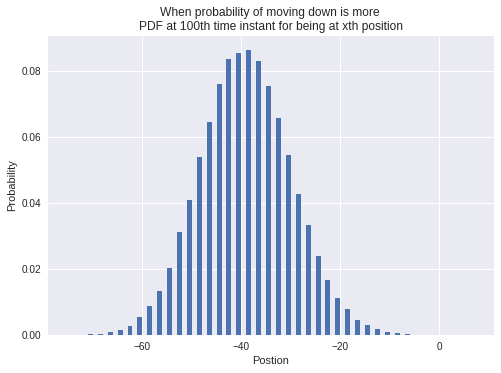

-39.58054 1650.11088


In [0]:
find_diffusion_constant("When probability of moving down is more \n", lis)
plot("When probability of moving down is more \n",lis)
info(lis)
del lis

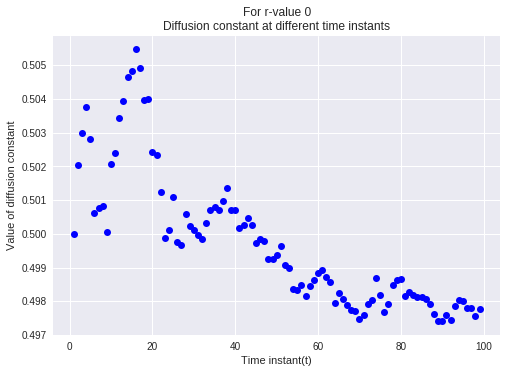

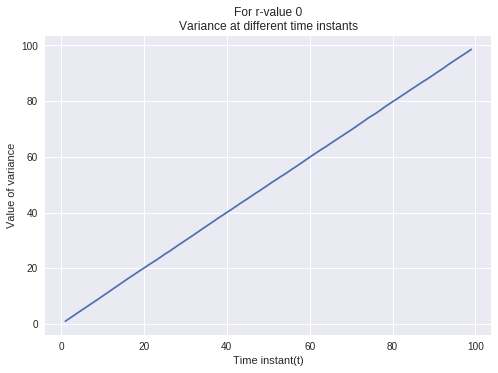

0.4997459308728139
-43.0 43.0


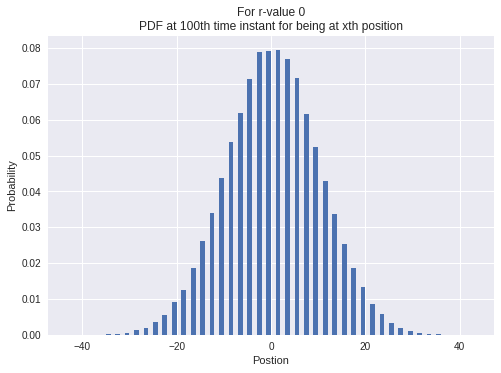

-0.05284 98.56224


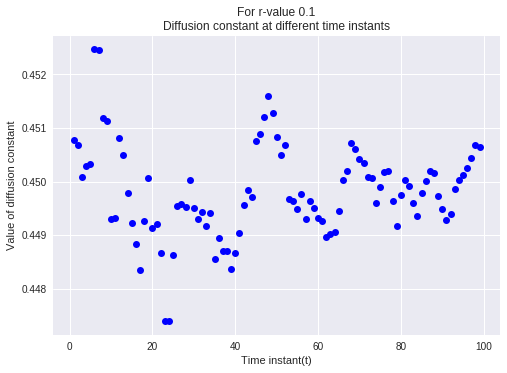

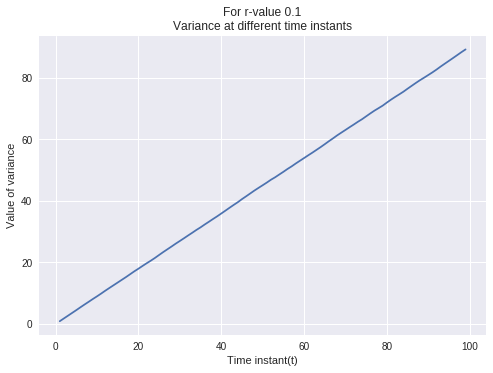

0.44980383163334803
-39.0 40.0


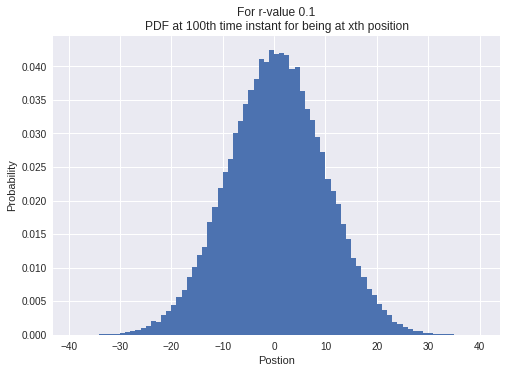

-0.01029 89.22665


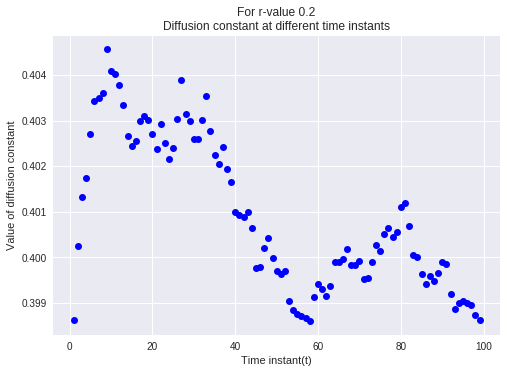

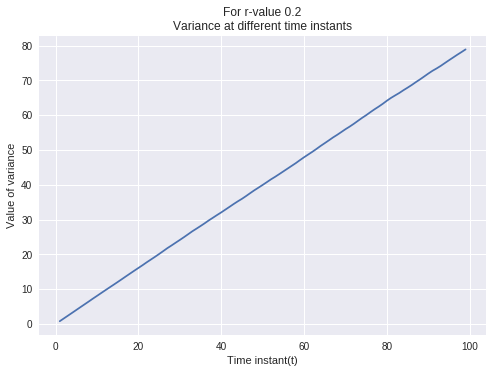

0.4009164816889471
-38.0 38.0


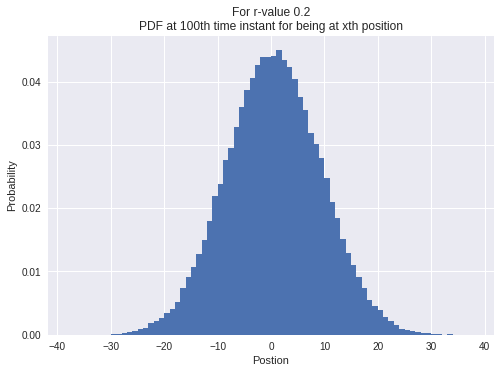

0.01913 78.93069


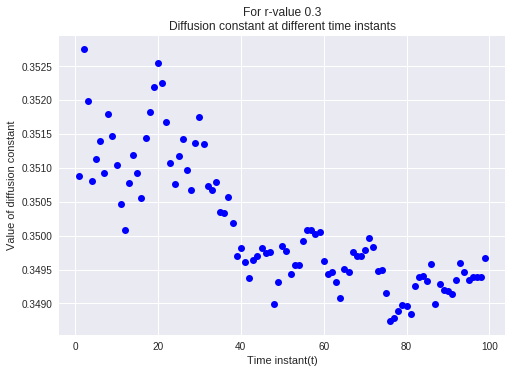

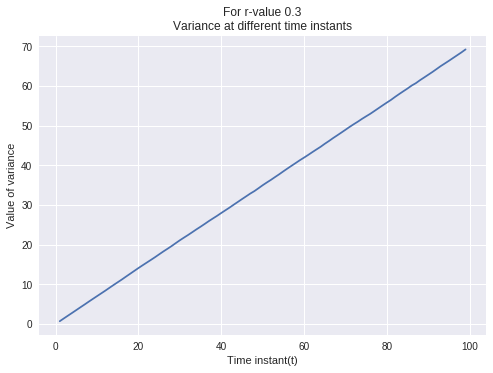

0.3501270123580291
-34.0 34.0


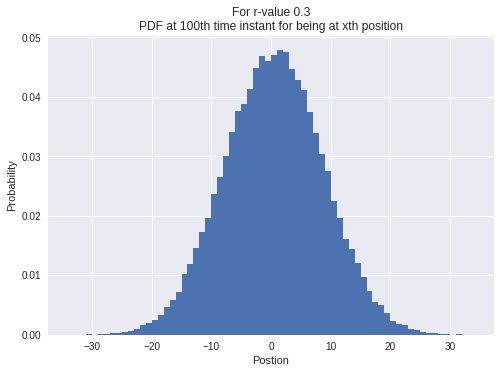

0.00678 69.23436


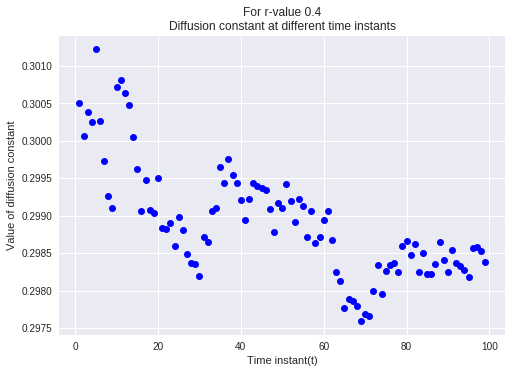

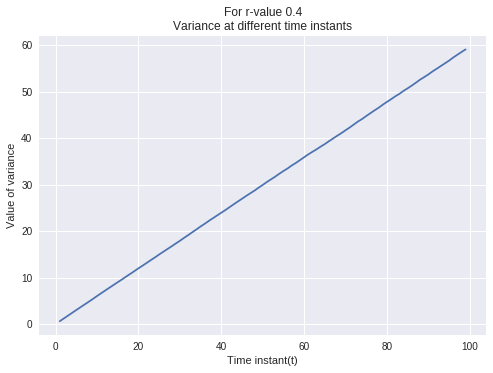

0.29891848702052987
-36.0 33.0


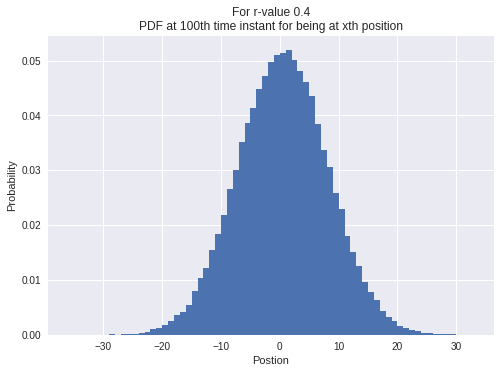

0.00262 59.08102


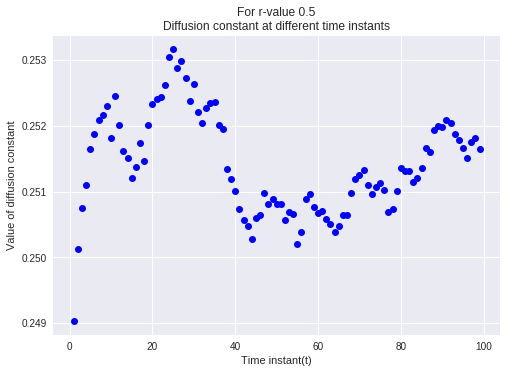

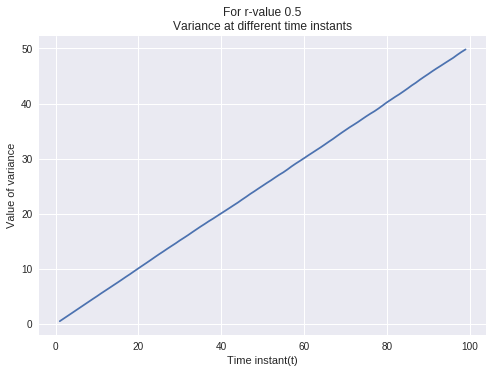

0.2514072867119991
-31.0 33.0


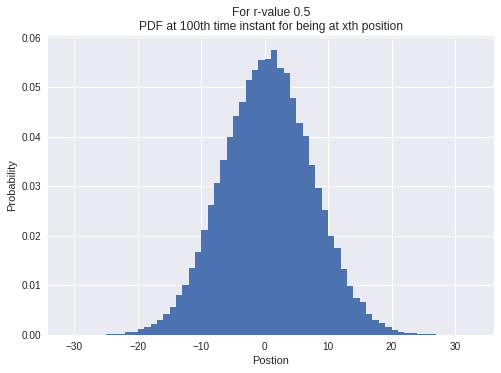

-0.02181 49.82585


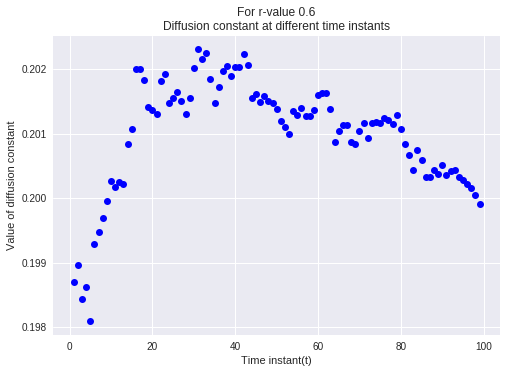

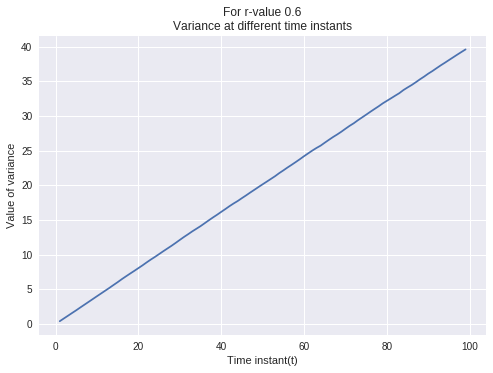

0.20099924559100044
-27.0 29.0


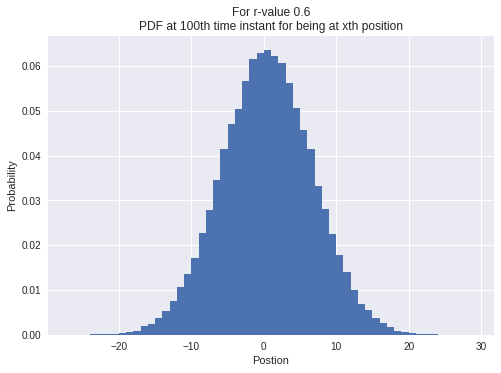

-0.01907 39.58395


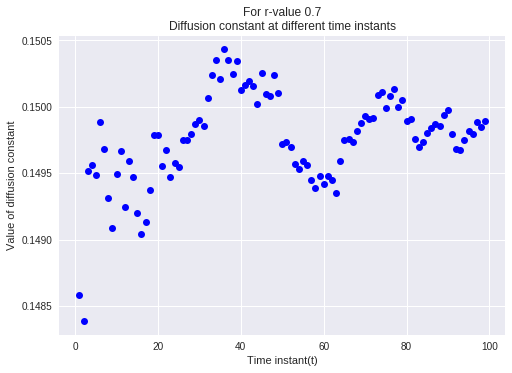

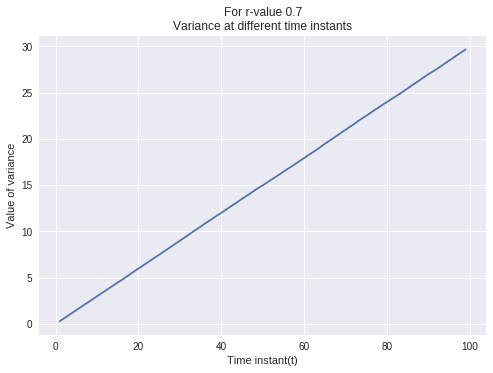

0.14976015763806044
-22.0 23.0


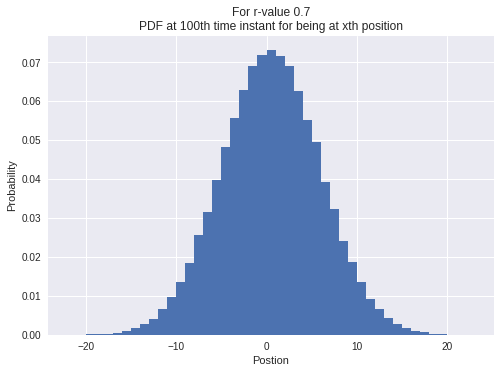

-0.0097 29.6792


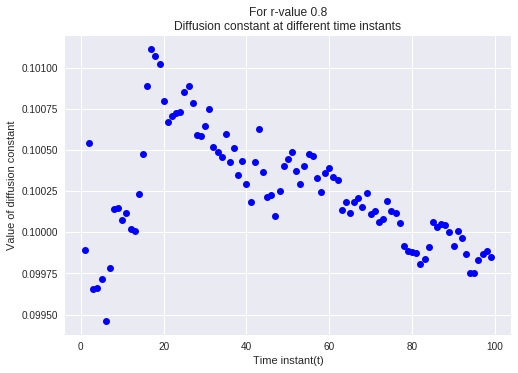

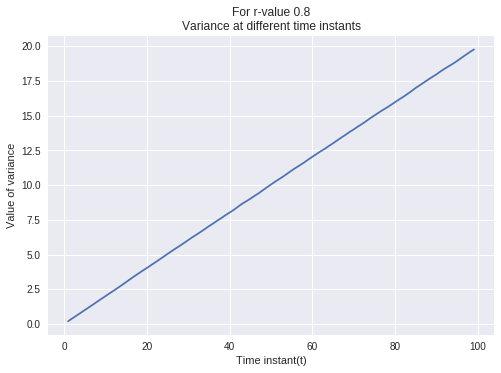

0.10024844697386166
-21.0 19.0


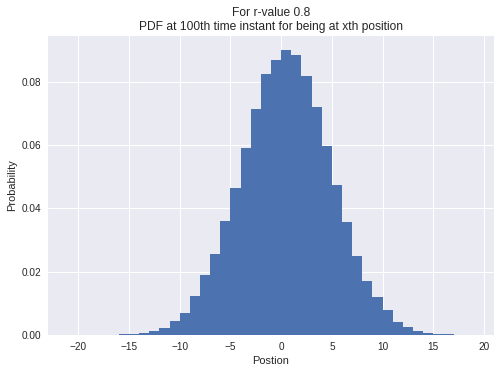

-0.00975 19.77063


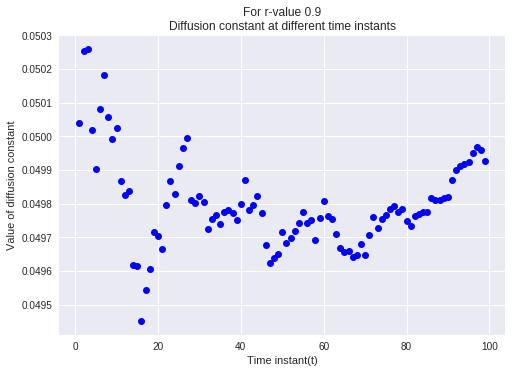

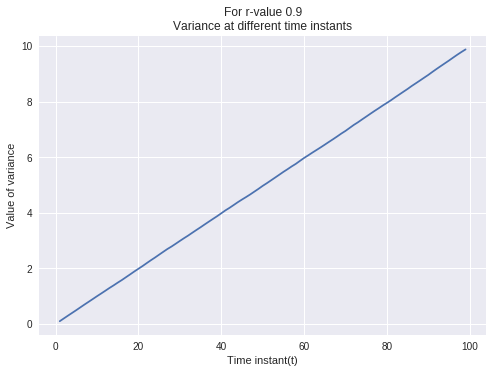

0.04979908850169528
-14.0 13.0


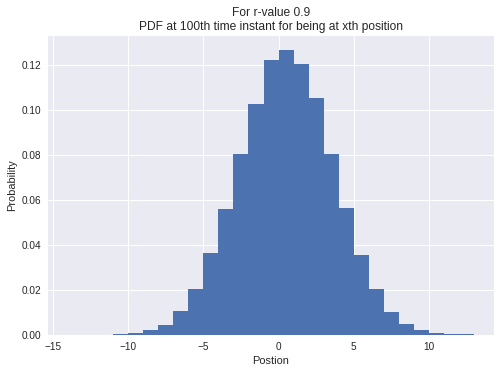

0.00192 9.8854


In [0]:
random.seed(2)
r_vals = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
mean_dists = []
mean_sq_dists = []
diff_consts = []
for r_val in r_vals:
  p = (1 - r_val) / 2
  probs = [p,1-p]
  runs = 100000
  lis = []
  for r in range(runs):
    init = 0
    time = 100
    k = 0
    walks = np.zeros(time)
    walks[k] = init
    k = k + 1
    rr = np.random.random(len(walks)-1)
    for i in range(1,time):
        if(rr[i-1] < probs[0]) :
          t = -1
        elif(rr[i-1]>probs[1]):
          t = 1
        else:
          t = 0
        init = init + t
        walks[k] = init
        k = k+1
    lis.append(walks)
    del walks
  lis = np.asarray(lis)
  d_const = find_diffusion_constant('For r-value ' + str(r_val) + '\n', lis)
  plot('For r-value ' + str(r_val) + '\n',lis)
  a,b = info(lis)
  mean_dists.append(a)
  mean_sq_dists.append(b)
  diff_consts.append(d_const)
  del lis

In [0]:
import pandas as pd
df = pd.DataFrame(columns=['R value','Mean distance','Mean square distance','Diffusion constant'])
i = 0
for j in range(len(mean_dists)):
  df.loc[i] = [r_vals[j] , mean_dists[j] , mean_sq_dists[j] , diff_consts[j]]
  i = i+1
df

,R value,Mean distance,Mean square distance,Diffusion constant
0,0.0,-0.00734,98.70432,0.498008
1,0.1,0.01682,88.95570,0.452746
2,0.2,0.01463,78.29801,0.397652
3,0.3,0.01754,69.33954,0.350451
4,0.4,-0.01261,59.04587,0.298049
5,0.5,0.02052,49.35018,0.248805
6,0.6,0.01358,39.75420,0.200407
7,0.7,0.00098,29.55682,0.149184
8,0.8,-0.00530,19.90904,0.100184
9,0.9,-0.00763,9.84799,0.049890


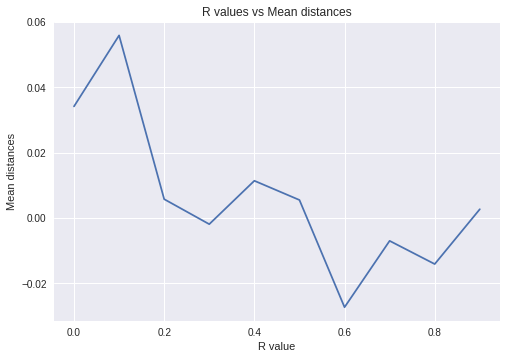

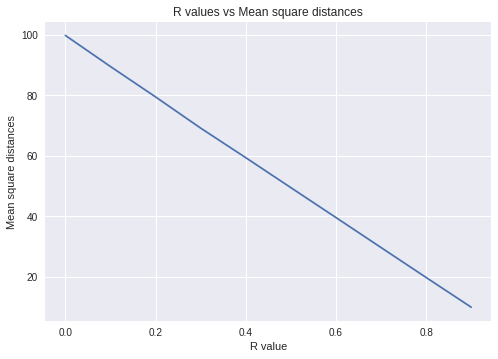

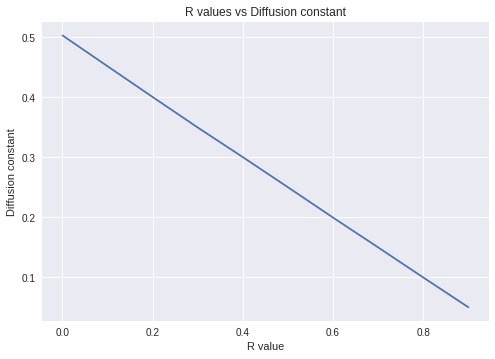

In [0]:
def plt_info():
  plt.xlabel('R value')
  plt.show()

plt.plot(r_vals,mean_dists)
plt.title('R values vs Mean distances')
plt.ylabel('Mean distances')
plt_info()

plt.plot(r_vals,mean_sq_dists)
plt.ylabel('Mean square distances')
plt.title('R values vs Mean square distances')
plt_info()

plt.plot(r_vals,diff_consts)
plt.title('R values vs Diffusion constant')
plt.ylabel('Diffusion constant')
plt_info()

R value increase implies Diffusion constant decrease 

R value incraese implies Mean squared disatnce decrease


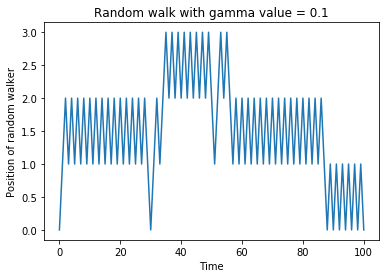

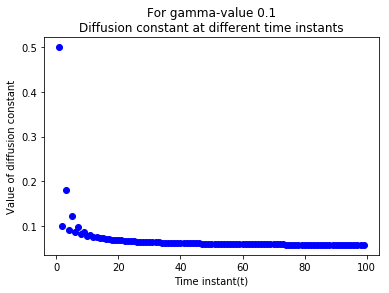

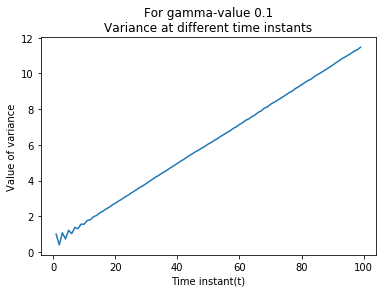

0.07002202256392877
-15.0 15.0


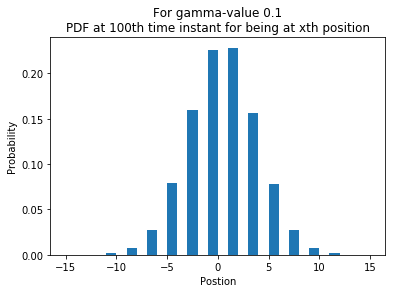

-0.0077 11.46576


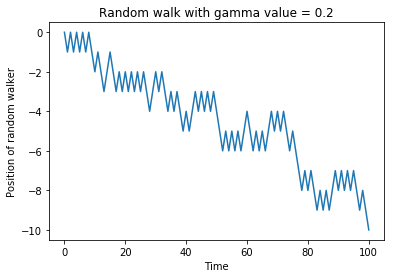

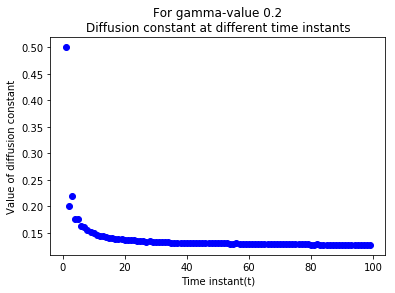

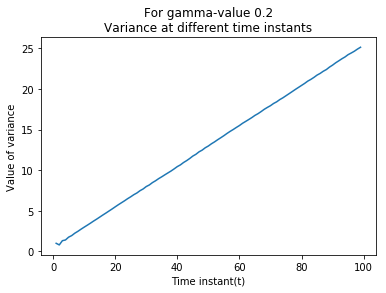

0.1383042640582008
-21.0 23.0


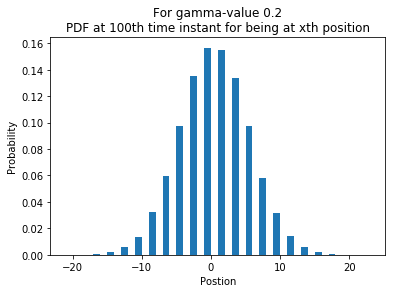

-0.01182 25.12032


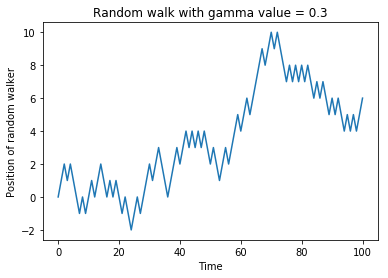

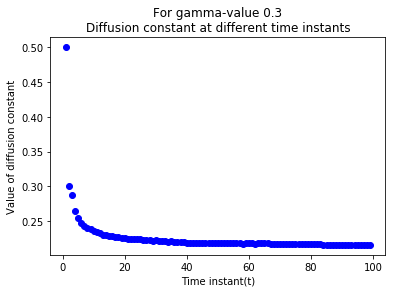

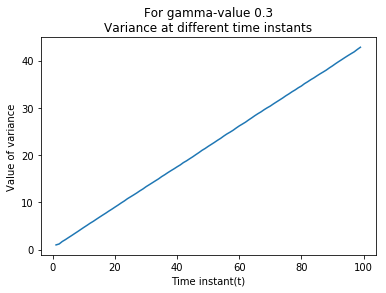

0.22587221438953067
-29.0 29.0


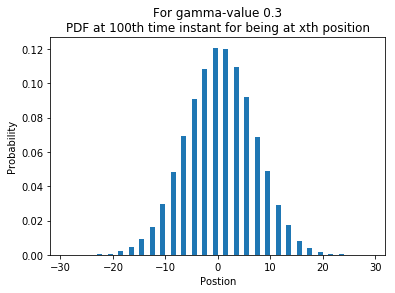

-0.02422 42.83216


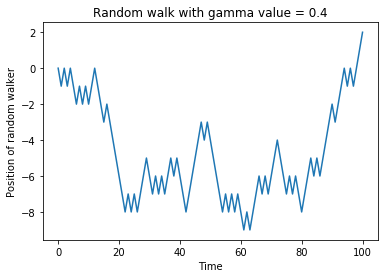

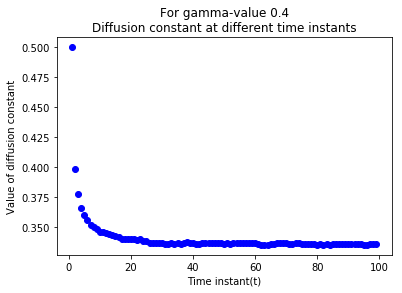

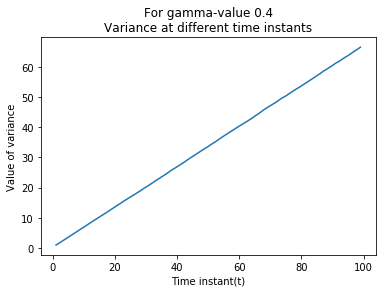

0.34100406657055415
-35.0 35.0


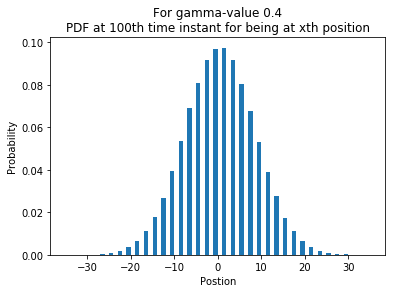

-0.02196 66.49624


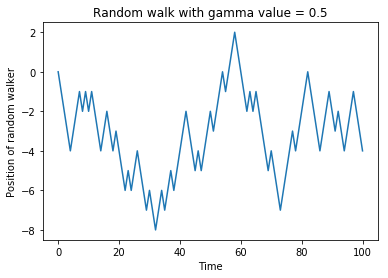

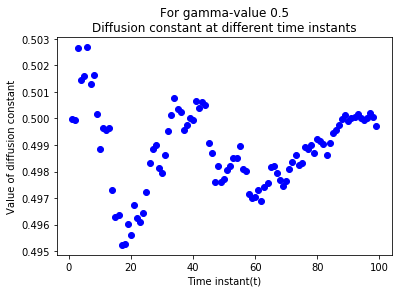

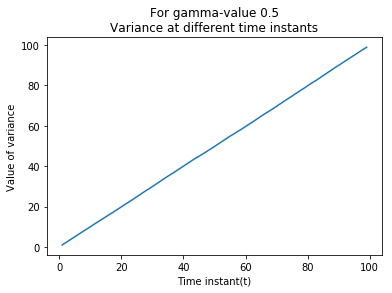

0.49882268468601676
-43.0 41.0


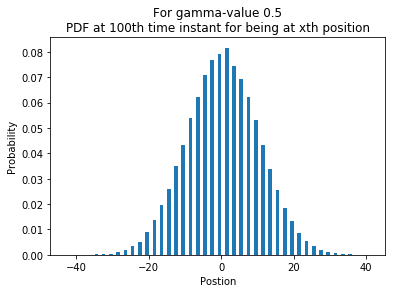

-0.06128 98.9456


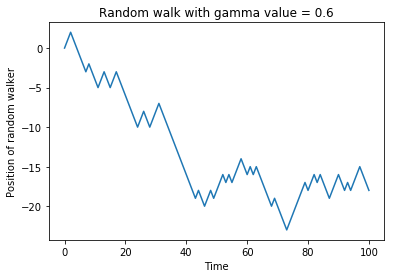

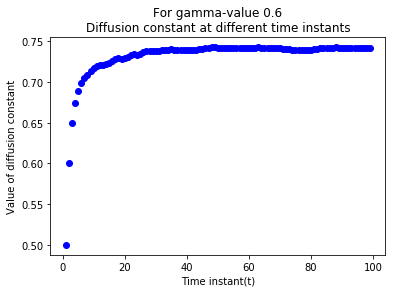

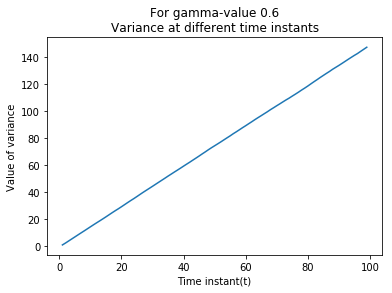

0.7311371457893978
-55.0 49.0


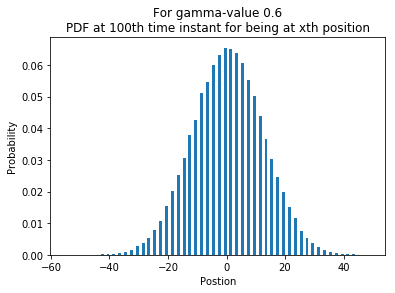

-0.01894 146.96816


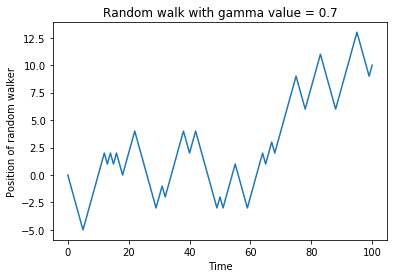

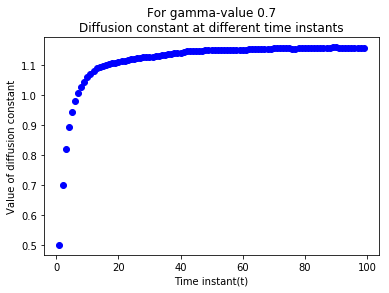

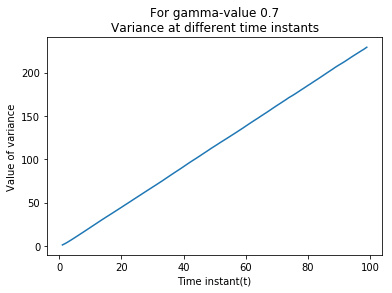

1.1173982211164792
-65.0 61.0


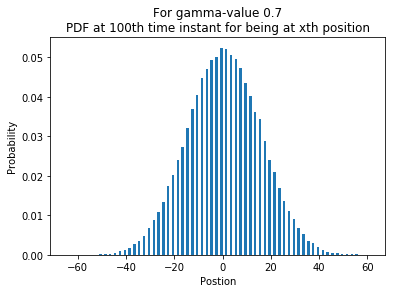

0.0926 229.36816


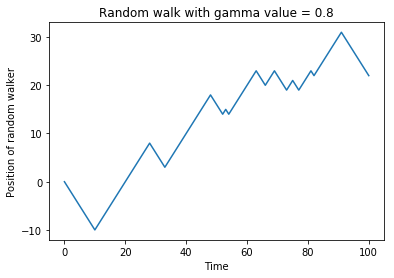

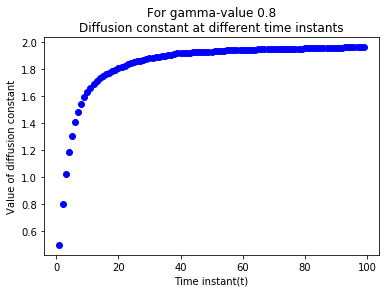

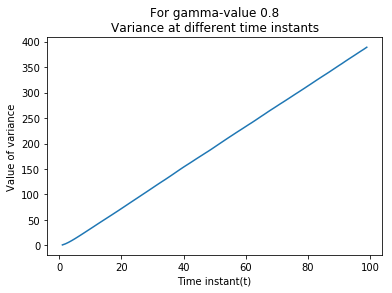

1.8431553244793963
-77.0 79.0


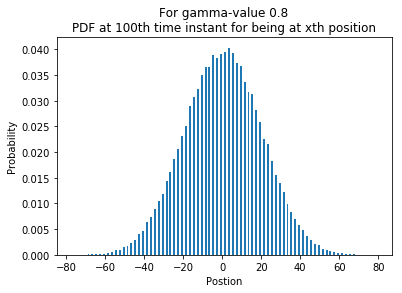

-0.14044 388.96552


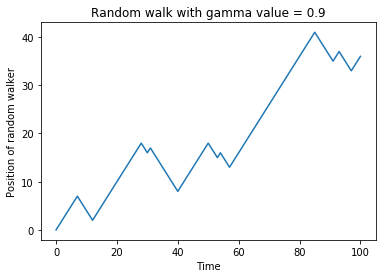

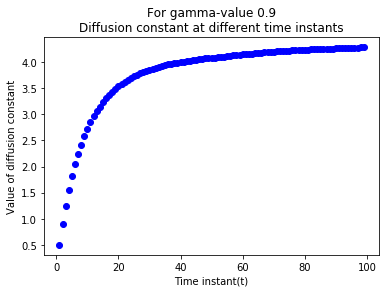

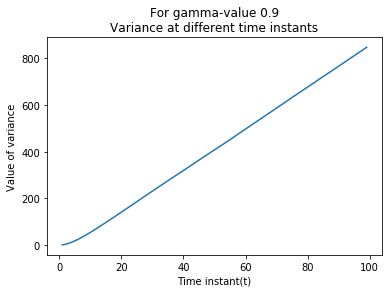

3.7740565867501696
-97.0 99.0


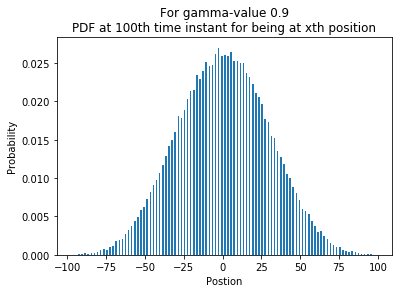

0.07164 847.97952


In [21]:
random.seed(2)
gamma_vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# gamma_vals = [0.1]
mean_dists = []
mean_sq_dists = []
diff_consts = []

for gamma in gamma_vals:
  runs = 100000
  lis = []
  for r in range(runs):
    init = 0
    time = 100
    k = 0
    walks = np.zeros(time+1)  
    walks[k] = init
    k = k + 1
    last_t = 0
    rr = np.random.random(len(walks))
    for i in range(1,time+1):
      if(i==1):
        if(rr[0]<=0.5):
          t = -1
        else:
          t = 1
      else:
        if(rr[i-1] < gamma) :
          t = last_t
        else:
          if(last_t==1):
            t = -1
          else:
            t = 1
      init = init + t
      walks[k] = init
      k = k+1
      last_t = t  
    if(r==0):
      plt.plot(walks)
      plt.title('Random walk with gamma value = ' + str(gamma))
      plt.xlabel('Time')
      plt.ylabel('Position of random walker')
      plt.show()
    lis.append(walks)
    del walks
  lis = np.asarray(lis)
  d_const = find_diffusion_constant('For gamma-value ' + str(gamma) + '\n', lis)
  plot('For gamma-value ' + str(gamma) + '\n',lis)
  a,b = info(lis)
  mean_dists.append(a)
  mean_sq_dists.append(b)
  diff_consts.append(d_const)
  del lis

In [15]:
import pandas as pd
df = pd.DataFrame(columns=['Gamme value','Mean distance','Mean square distance','Diffusion constant'])
i = 0
for j in range(len(mean_dists)):
  df.loc[i] = [gamma_vals[j] , mean_dists[j] , mean_sq_dists[j] , diff_consts[j]]
  i = i+1
df

,Gamme value,Mean distance,Mean square distance,Diffusion constant
0,0.1,-0.01178,11.47096,0.069809
1,0.2,-0.01226,25.25416,0.138354
2,0.3,0.01800,42.95592,0.226264
3,0.4,0.01270,66.70320,0.341991
4,0.5,0.05132,99.09712,0.499809
5,0.6,0.04612,147.06456,0.735139
6,0.7,-0.02238,228.85536,1.114073
7,0.8,-0.09970,388.01696,1.835239
8,0.9,-0.01092,849.08328,3.785045


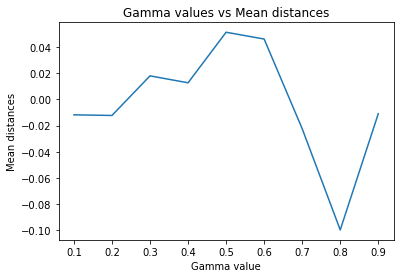

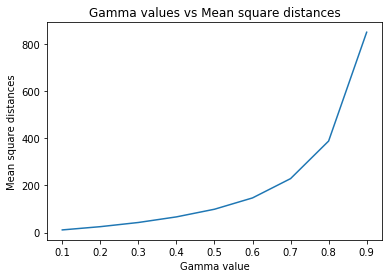

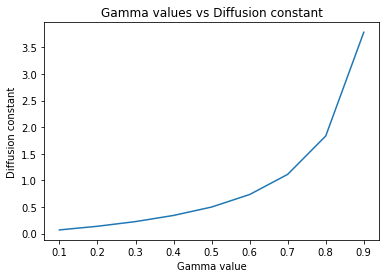

In [18]:
def plt_info():
  plt.xlabel('Gamma value')
  plt.show()

plt.plot(gamma_vals,mean_dists)
plt.title('Gamma values vs Mean distances')
plt.ylabel('Mean distances')
plt_info()

plt.plot(gamma_vals,mean_sq_dists)
plt.ylabel('Mean square distances')
plt.title('Gamma values vs Mean square distances')
plt_info()

plt.plot(gamma_vals,diff_consts)
plt.title('Gamma values vs Diffusion constant')
plt.ylabel('Diffusion constant')
plt_info()